Exploratory Data Analysis on Reddit 'cars' dataset



Data Inspection

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vehicle_features.csv')
print(df.head(10))

   Unnamed: 0  stockNumber                vin  year      make     model  \
0           0     24592442  1N4AA6AP3HC407486  2017    Nissan    Maxima   
1           1     23884887  1G6DJ1E36C0134929  2012  Cadillac       CTS   
2           2     24176587  1C4NJCBA0ED642552  2014      Jeep   Compass   
3           3     24438780  3N1AB8CV8LY301312  2020    Nissan    Sentra   
4           4     24675986  7SAYGDEF2NF538729  2022     Tesla   Model Y   
5           5     24233622  2C3CDXCT8KH562411  2019     Dodge   Charger   
6           6     22139598  3C4NJCAB0JT107039  2018      Jeep   Compass   
7           7     24675724  KM8K12AA7LU579456  2020   Hyundai      Kona   
8           8     24638853  JTHKD5BH9H2295644  2017     Lexus   CT 200h   
9           9     24574771  ZACCJABW0GPD15600  2016      Jeep  Renegade   

               body         trim  basePrice  msrp  ...  bestFinanceDecision  \
0          4D Sedan           SV    23998.0   NaN  ...                  NaN   
1          2D Co

In [155]:
df.describe(include = 'all')

,Unnamed: 0,stockNumber,vin,year,make,model,body,trim,basePrice,msrp,...,bestFinanceDecision,store,featureScore,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl
count,3483.000000,3.483000e+03,3483,3483.000000,3483,3483,3483,3168,3483.000000,0.0,...,0.0,3483,3258.000000,0.0,3483,0.0,288,3483,3483,0.0
unique,NaN,NaN,3478,NaN,35,387,18,328,NaN,NaN,...,NaN,12,NaN,NaN,109,NaN,47,1,3478,NaN
top,NaN,NaN,2HKRM3H30FH504605,NaN,Ford,F150,4D Sport Utility,SE,NaN,NaN,...,NaN,"{'id': 7154, 'name': 'Austin North', 'city': N...",NaN,NaN,[],NaN,3-SERIES,False,https://img2.carmax.com/assets/23890249/hero.j...,NaN
freq,NaN,NaN,2,NaN,405,99,1477,251,NaN,NaN,...,NaN,703,NaN,NaN,2883,NaN,27,3483,2,NaN
mean,1741.000000,2.473939e+07,NaN,2018.577089,NaN,NaN,NaN,NaN,27990.832328,NaN,...,NaN,NaN,6.128300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1005.599821,3.807344e+05,NaN,2.783601,NaN,NaN,NaN,NaN,10021.640500,NaN,...,NaN,NaN,2.162309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.977827e+07,NaN,2012.000000,NaN,NaN,NaN,NaN,9998.000000,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,870.500000,2.463100e+07,NaN,2017.000000,NaN,NaN,NaN,NaN,20998.000000,NaN,...,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1741.000000,2.484641e+07,NaN,2019.000000,NaN,NaN,NaN,NaN,25998.000000,NaN,...,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2611.500000,2.500653e+07,NaN,2021.000000,NaN,NaN,NaN,NaN,32998.000000,NaN,...,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3483 non-null   int64  
 1   stockNumber                  3483 non-null   int64  
 2   vin                          3483 non-null   object 
 3   year                         3483 non-null   int64  
 4   make                         3483 non-null   object 
 5   model                        3483 non-null   object 
 6   body                         3483 non-null   object 
 7   trim                         3168 non-null   object 
 8   basePrice                    3483 non-null   float64
 9   msrp                         0 non-null      float64
 10  mileage                      3483 non-null   int64  
 11  storeId                      3483 non-null   int64  
 12  storeName                    3483 non-null   object 
 13  storeCity         

In [157]:
sorted_makes = df["make"].unique().tolist()
sorted_makes.sort()
print(sorted_makes)

df["make"].value_counts(normalize=True).sort_values(ascending=False).head(10)

['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Fiat', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Scion', 'Smart', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']


make
Ford          0.116279
Toyota        0.103359
Chevrolet     0.084697
Nissan        0.083262
Honda         0.064599
Hyundai       0.058570
Kia           0.053115
Jeep          0.048234
Volkswagen    0.038760
BMW           0.033592
Name: proportion, dtype: float64

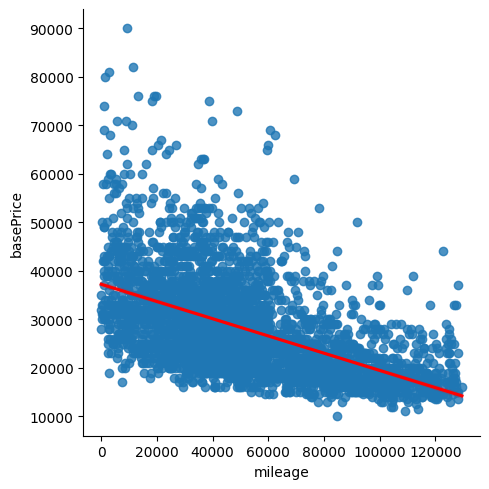

In [158]:
sns.lmplot(data=df, x="mileage", y="basePrice", line_kws={"color": "red"},) 

Cleaning Data

In [159]:
df.isnull().sum()

Unnamed: 0                  0
stockNumber                 0
vin                         0
year                        0
make                        0
                         ... 
types                    3483
series                   3195
isSavedCar                  0
heroImageUrl                0
heroThumbnailImageUrl    3483
Length: 77, dtype: int64

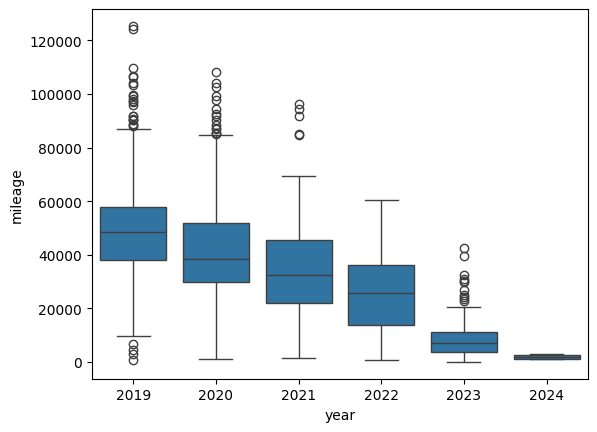

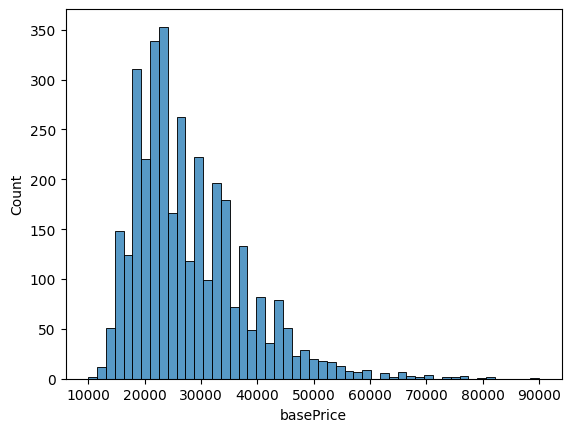

In [160]:
# Boxplot for Mileage 
df_newest_5_years = df[df["year"] >= 2019]
sns.boxplot(x='year',y='mileage',data = df_newest_5_years,)
plt.show()
plt.close()

# Histogram for Base Price
sns.histplot(x='basePrice', data = df)
plt.show()
plt.close()

In [161]:
top_makes = df["make"].value_counts()
top_makes = top_makes.value_counts()
sns.countplot(x='make', data = top_makes)
plt.show()
plt.close()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.